<a href="https://colab.research.google.com/github/Khemapsorn/data_viz_2022/blob/main/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%A3%E0%B8%B0%E0%B8%9A%E0%B8%B2%E0%B8%94%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B9%82%E0%B8%A3%E0%B8%84%E0%B8%95%E0%B8%B4%E0%B8%94%E0%B9%80%E0%B8%8A%E0%B8%B7%E0%B9%89%E0%B8%AD%E0%B9%84%E0%B8%A7%E0%B8%A3%E0%B8%B1%E0%B8%AA%E0%B9%82%E0%B8%84%E0%B8%A7%E0%B8%B4%E0%B8%94-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libralies
import pandas as pd # ใช้จัดการข้อมูลต่าง ๆ ที่เป็นตาราง พวกexcel ,CSV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # พล็อตกราฟต่างๆ 

from scipy.integrate import odeint #Integrate a system of ordinary differential equations.
                                                # func(y, t0, ...) 

%config InlineBackend.figure_format = 'retina'

# SIR model

In [2]:
# SIR model
# Differential equation สมการเชิงอนุพันธ์
def deriv(y, t, N, beta, gamma): # ตัวแปร
    S, I, R = y
    dSdt =(-beta*S*I) / N
    dIdt = ((beta*S*I) / N) - gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

# กำหนดค่าต่าง ๆ (เตรียมข้อมูลแบบจำลอง)

In [10]:
# Number of population
N = 1000

# Time period (100 days)
t = np.arange(0,100,1)

# Initial number of infected and recoverd
I0 = 1
R0 = 0

#Initial susceptible to infection (Start with 1)
S0 = N - I0 - R0

# Set Beta and Gamma
beta = 0.25
gamma = 0.1

# Constant rate beta and gamma rates
#b = 1 / beta
#g = 1 / gamma

#Integration SIR model
simulationresult = odeint(deriv, (S0, I0, R0), t, args = (N,beta,gamma))

#Summary
simulationResult = pd.DataFrame(simulationresult, columns = ['Susceptible', 'Infectious','Recovery'])
simulationResult = simulationResult.astype(np.int32)

In [11]:
t = np.arange(0,100,1)
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [12]:
S0 = N - I0 - R0 # 1000-1-0
S0

999

In [13]:
simulationresult = odeint(deriv, (S0, I0, R0), t, args = (N,beta,gamma)) # คำสั่งใช้หา Differential equation
simulationresult

array([[9.99000000e+02, 1.00000000e+00, 0.00000000e+00],
       [9.98730620e+02, 1.16150567e+00, 1.07874456e-01],
       [9.98417836e+02, 1.34899746e+00, 2.33166716e-01],
       [9.98054700e+02, 1.56662228e+00, 3.78677665e-01],
       [9.97633168e+02, 1.81917696e+00, 5.47654670e-01],
       [9.97143933e+02, 2.11220591e+00, 7.43861285e-01],
       [9.96576231e+02, 2.45211183e+00, 9.71657342e-01],
       [9.95917627e+02, 2.84628145e+00, 1.23609117e+00],
       [9.95153769e+02, 3.30322634e+00, 1.54300472e+00],
       [9.94268105e+02, 3.83274068e+00, 1.89915382e+00],
       [9.93241579e+02, 4.44607637e+00, 2.31234509e+00],
       [9.92052273e+02, 5.15613548e+00, 2.79159117e+00],
       [9.90675034e+02, 5.97767964e+00, 3.34728604e+00],
       [9.89081044e+02, 6.92755420e+00, 3.99140218e+00],
       [9.87237366e+02, 8.02492396e+00, 4.73771052e+00],
       [9.85106461e+02, 9.29151461e+00, 5.60202454e+00],
       [9.82645681e+02, 1.07518512e+01, 6.60246826e+00],
       [9.79806751e+02, 1.24334

In [14]:
simulationResult = pd.DataFrame(simulationresult, columns = ['Susceptible', 'Infectious','Recovery'])
simulationResult

,Susceptible,Infectious,Recovery
0,999.000000,1.000000,0.000000
1,998.730620,1.161506,0.107874
2,998.417836,1.348997,0.233167
3,998.054700,1.566622,0.378678
4,997.633168,1.819177,0.547655
...,...,...,...
95,114.365124,18.691427,866.943450
96,113.850519,17.402103,868.747378
97,113.373522,16.199710,870.426768
98,112.931305,15.078664,871.990031


In [15]:
simulationResult = simulationResult.astype(np.int32) # ปรับตัวเลขเป็นจำนวนเต็มของตารางข้างบน
simulationResult

,Susceptible,Infectious,Recovery
0,999,1,0
1,998,1,0
2,998,1,0
3,998,1,0
4,997,1,0
...,...,...,...
95,114,18,866
96,113,17,868
97,113,16,870
98,112,15,871


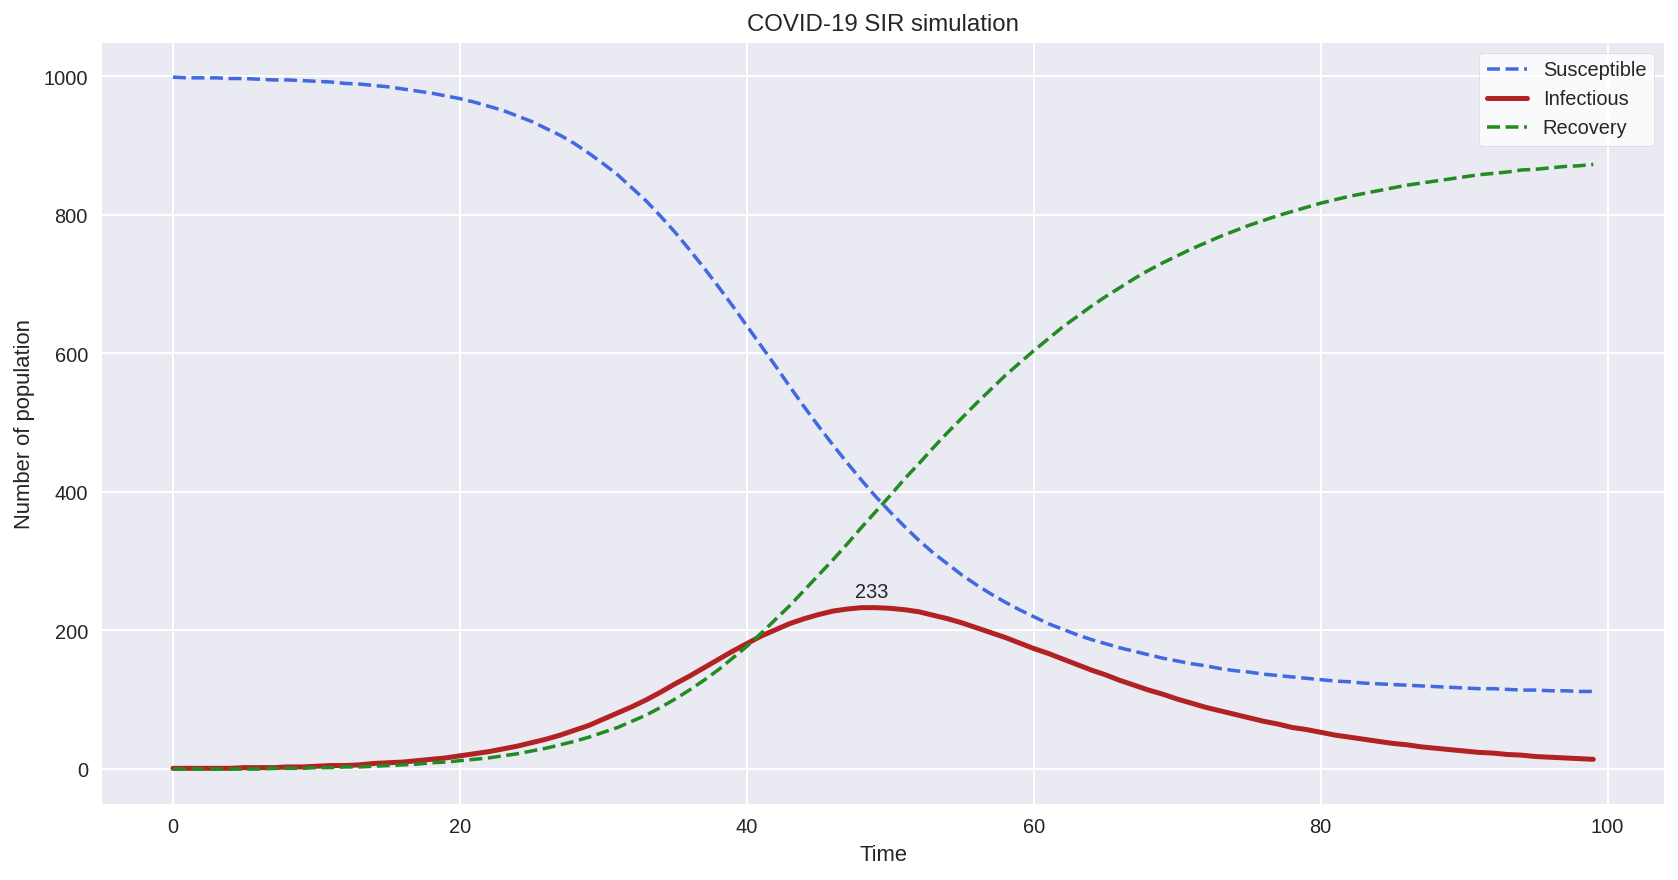

In [16]:
# plot the simulation
plt.figure (figsize = (14, 7)) #กำหนดขนาด
with plt.style.context('seaborn'): # พล็อตเนื้อหา สไตล์ต่าง ๆ
    plt.title('COVID-19 SIR simulation') # ชื่อกราฟ
    plt.xlabel('Time') # แกน X
    plt.ylabel('Number of population') # แกน Y
    plt.plot(simulationResult['Susceptible'], c = 'royalblue', linestyle = '--',label = 'Susceptible') # S
    plt.plot(simulationResult['Infectious'], c = 'firebrick', linewidth = 2.5,label = 'Infectious') #I
    plt.plot(simulationResult['Recovery'], c = 'forestgreen', linestyle = '--' ,label = 'Recovery') # R
    plt.annotate(simulationResult['Infectious'].max(),
                    (simulationResult['Infectious'].idxmax(), simulationResult['Infectious'].max()),
                    textcoords = 'offset points', xytext = (5,5),ha = 'center')
    plt.legend(frameon = True, facecolor = 'white') # โชว์เส้นกริด ทำเป็นสีขาว
    plt.show()